# **Using Residual Sugar, Citric Acid and Volatile Acidity to judge a wine's quality.**
#### Leewana Nanda,
#### Arjun Bhatia, 
#### Maya Tharp, 
#### Sue Dong

### Introduction


Wine quality can be determined by a number of factors, ranging from physicochemical properties, such as residual sugar, to sensory properties, like aroma, color and flavor. However, it is the interaction between the physicochemical properties and the sensory properties that allows for a judgment to be made regarding the quality of the wine (Gutiérrez-Escobar et al., 2021). This project will investigate if physicochemical properties of sweet red wine can predict the quality of the red wine. The dataset chosen is “Wine Quality” from UC Irvine and it is a multivariate dataset. The dataset has twelve variables in total, including the target “quality” variable and looks at several physicochemical properties. 


### Preliminary Data Analysis

In [50]:
#Importing libraries
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)

In [51]:
#Reading the data fom the URL and making it tidy
wine_data <- read.csv2("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv")
wine_data



fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>
7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
7.8,0.88,0,2.6,0.098,25,67,0.9968,3.2,0.68,9.8,5
7.8,0.76,0.04,2.3,0.092,15,54,0.997,3.26,0.65,9.8,5
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
6.3,0.51,0.13,2.3,0.076,29,40,0.99574,3.42,0.75,11,6
5.9,0.645,0.12,2,0.075,32,44,0.99547,3.57,0.71,10.2,5
6,0.31,0.47,3.6,0.067,18,42,0.99549,3.39,0.66,11,6


In [58]:
#Selecting the variables we will need for our analysis and then converitng them to the right type.
wine_data = select(wine_data, volatile.acidity, 
                              citric.acid,
                              residual.sugar, 
                              quality) |>
            mutate(volatile.acidity = as.numeric(volatile.acidity))|>
            mutate(citric.acid = as.numeric(citric.acid))|>
            mutate(residual.sugar = as.numeric(residual.sugar))|>
            mutate(quality = as.factor(quality))
wine_data

volatile.acidity,citric.acid,residual.sugar,quality
<dbl>,<dbl>,<dbl>,<fct>
0.70,0.00,1.9,5
0.88,0.00,2.6,5
0.76,0.04,2.3,5
⋮,⋮,⋮,⋮
0.510,0.13,2.3,6
0.645,0.12,2.0,5
0.310,0.47,3.6,6


In [59]:
#Splitting the data set into training and testing
wine_split <- initial_split(wine_data, prop = 3/4, strata = quality)

wine_training <- training(wine_split)
wine_testing <- testing(wine_split)

wine_training

volatile.acidity,citric.acid,residual.sugar,quality
<dbl>,<dbl>,<dbl>,<fct>
0.70,0,1.9,5
0.70,0,1.9,5
0.66,0,1.8,5
⋮,⋮,⋮,⋮
0.37,0.43,2.3,7
0.56,0.17,1.7,7
0.32,0.44,2.4,7


In [61]:
#Summarizing the data in our taining set
wine_summarized <- wine_training |>
                   group_by(quality)|>
                   summarize(min_va = min(volatile.acidity), max_va = max(volatile.acidity),
                             min_ca = min(citric.acid), max_ca = max(citric.acid),
                             min_rs = min(residual.sugar), max_rs = max(residual.sugar)) 
wine_summarized

quality,min_va,max_va,min_ca,max_ca,min_rs,max_rs
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3,0.44,1.580,0.00,0.49,1.2,5.7
4,0.35,1.115,0.00,0.50,1.3,6.3
5,0.18,1.330,0.00,0.79,1.2,15.5
6,0.18,1.040,0.00,0.78,0.9,15.4
7,0.12,0.840,0.00,0.76,1.2,8.3
8,0.26,0.850,0.03,0.72,1.4,6.4


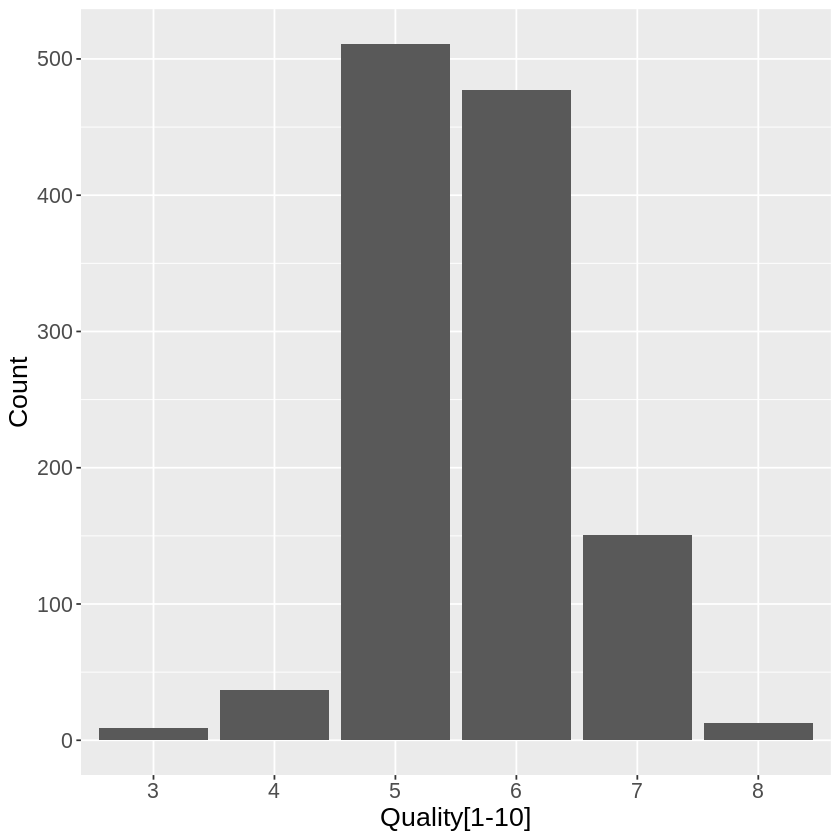

In [95]:
#Plotting the fequency of quality
quality_bar <- ggplot(wine_training, aes(x = quality)) +
               geom_bar() +
               labs(x = "Quality[1-10]", y = "Count") +
               theme(text = element_text(size = 16))
quality_bar

### Methods

To investigate if red wine quality can be predicted by chemical components that affect the sweetness of red wine, we will perform classification with K-nearest neighbours. This technique will allow us to find how similar new observations related to sweetness are to the dataset which we can use to predict the quality of the wine. Our predictors will be residual sugar, citric acid, and volatile acid. Residual sugar refers to the amount of sugar left after a wine has been fermented, thus directly impacting the sweetness of the wine (Hulkower, 2022). Our taste buds are sensitive to five tastes, two of which are acidic and sweet (Jackson, 2008). When acidic and sweet flavours are present, they compete for our sensory attention and one can over-power the other (Hulkower, 2022). Thus, we will be using the citric acid content and volatile acidity as predictors as they can cause wines to be less sweet. As our project consists of quantitative values, we will be using scatter plots to visualize the relationship between the red wine quality score and each predictor respectively. We are using numerical variables residual sugar, citric acid, and volatile acidity as predictors for our categorical variable (wine quality). 


### Expected outcomes and Significance 


We expect to find that the quality of wine can be predicted by the sweetness and that sweeter wines will be of higher quality. This finding could help winemakers make higher quality wine by adjusting the amount of residual sugar, citric acid, and volatile acidity in their wines. Additionally, they can adjust sweetness levels to produce red wines of specific quality. Predicting red wine quality based on sweetness may also raise some future issues, for example, we need to study the interactions between these predictors in more depth to understand how they work together to affect wine quality, which may require more sophisticated models and analytical methods. Additionally, it is difficult to define what sweetness metrics are best suited for predicting red wine quality. Thus, our findings could lead to an investigation of how other chemical components interact with sweetness that may have a significant effect on red wine quality which would need to be considered and incorporated into the model.


### Works Cited

Hulkower, N. D. (2022). Jamie Goode: The Science of Wine from Vine to Glass, 3rd Edition University of California Press, Oakland, 2021, 224 pp., ISBN 978-0-520-37950-3. 

Journal of Wine Economics, 17(3), 264–267. https://doi.org/10.1017/jwe.2022.37
Jackson, R. S. (2008). Wine science: Principles and applications (3. ed). Elsevier